In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import ticker

In [20]:
mwTQ_PATH = '/pscratch/sd/h/heroplr/R2_analysis_all/'
mwTQ = xr.open_mfdataset(mwTQ_PATH+'tep2_lot-101_trial_0028.best.h5_mwvaave2.nc')

In [22]:
lon = mwTQ.lon.values
lat = mwTQ.lat.values
mwT_rmse = mwTQ.Trmsemean.values
mwQ_rmse = mwTQ.Qrmsemean.values

In [25]:
mwQ_rmse

array([[0.00347143, 0.00347143, 0.00347143, ..., 0.00300145, 0.00300145,
        0.00300145],
       [0.00347143, 0.00347143, 0.00347143, ..., 0.00300145, 0.00300145,
        0.00300145],
       [0.00347143, 0.00347143, 0.00347143, ..., 0.00300145, 0.00300145,
        0.00300145],
       ...,
       [0.00282098, 0.00282098, 0.00282098, ..., 0.00344382, 0.00344382,
        0.00344382],
       [0.00282098, 0.00282098, 0.00282098, ..., 0.00344382, 0.00344382,
        0.00344382],
       [0.00282098, 0.00282098, 0.00282098, ..., 0.00344382, 0.00344382,
        0.00344382]])

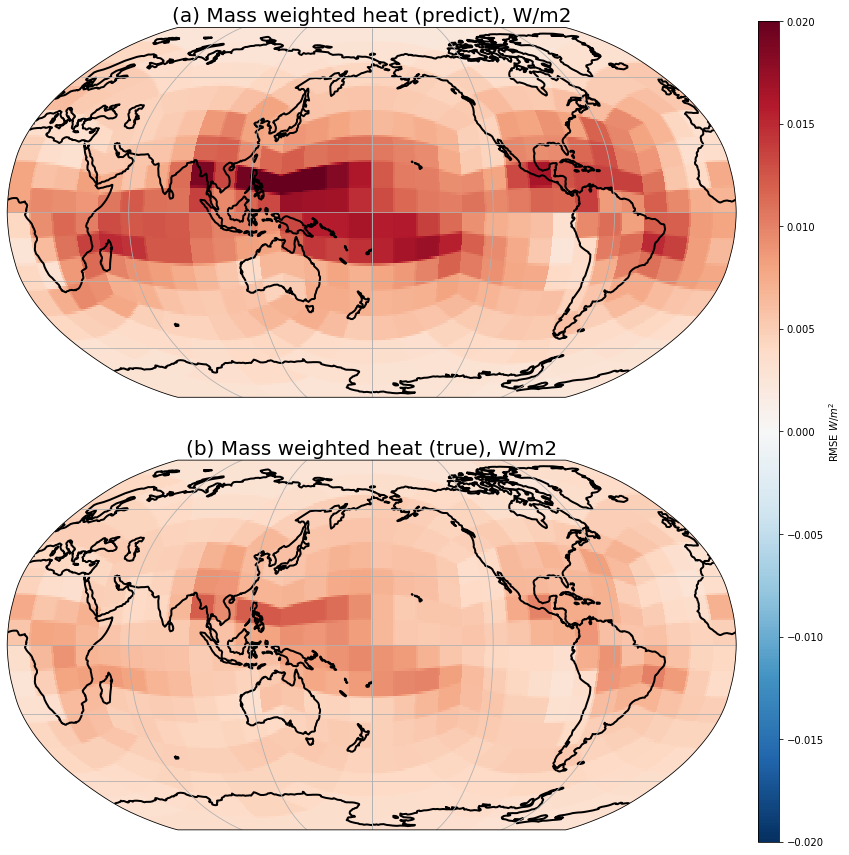

In [29]:
fig, ax = plt.subplots(2,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)
fz = 20
contour_plot = ax[0].pcolormesh(lon, lat, mwT_rmse,cmap='RdBu_r', vmin = -0.02, vmax = 0.02, transform=ccrs.PlateCarree())
ax[0].set_title('(a) Mass weighted heat (predict), W/m2', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()

contour_plot = ax[1].pcolormesh(lon, lat, mwQ_rmse,cmap='RdBu_r', vmin = -0.02, vmax = 0.02, transform=ccrs.PlateCarree())
ax[1].set_title('(b) Mass weighted heat (true), W/m2', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.02, 0.76])
fig.colorbar(contour_plot, label="RMSE "+r'$W/m^2$', cax=cbar_ax)
        #plt.suptitle("Trained DNN Skill for Vertically Resolved Tendencies", y = 0.97)
plt.subplots_adjust(hspace=0.13)
plt.savefig('Heat.pdf')